Lab 4
- Carlos Jarrin
- Fausto Yugcha

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Import Tokenizer and pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, GRU, Dense, SimpleRNN
from sklearn.naive_bayes import MultinomialNB


In [4]:
# Descargar recursos necesarios de NLTK
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Leer los datos
train_data = pd.read_csv("/content/drive/MyDrive/NLP/datos/train.tsv", sep = '\t')

In [7]:
# Reducir las categorías de sentimiento a tres clases
def simplificar_sentimiento(sentimiento):
    if sentimiento in [0, 1]:
        return 'negative'
    elif sentimiento == 2:
        return 'neutral'
    else:
        return 'positive'

train_data['Simplified_Sentiment'] = train_data['Sentiment'].apply(simplificar_sentimiento)

In [8]:
# Filtrar las tres categorías
train_data = train_data[train_data['Simplified_Sentiment'].isin(['negative', 'neutral', 'positive'])]


In [9]:
# Dividir los datos
X = train_data['Phrase']
y = train_data['Simplified_Sentiment']

In [10]:
# Convertir las etiquetas a categorías numéricas
y = pd.get_dummies(y)

In [11]:
# Tokenización y padding de secuencias
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100)

In [12]:
# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=13, stratify=y)

In [13]:
# Crear y entrenar un modelo RNN
def modelo_rnn():
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
    model.add(SimpleRNN(64))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
# Crear y entrenar un modelo LSTM
def modelo_lstm():
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
    model.add(LSTM(64))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
# Crear y entrenar un modelo GRU
def modelo_gru():
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
    model.add(GRU(64))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [27]:
# Entrenar los modelos y evaluar
def entrenar_y_evaluar(modelo, X_train, y_train, X_test, y_test, modelo_nombre):
    print(f"\nEntrenando el modelo {modelo_nombre}...")
    modelo.fit(X_train, y_train, epochs=35, batch_size=64, validation_split=0.1)
    y_pred = modelo.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test.values, axis=1)
    accuracy = accuracy_score(y_true, y_pred_classes)
    report = classification_report(y_true, y_pred_classes, target_names=['negative', 'neutral', 'positive'])
    print(f"\nAccuracy del modelo {modelo_nombre}: {accuracy:.4f}")
    print(f"\nReporte de clasificación para {modelo_nombre}:\n{report}")

        # Matriz de confusión
    conf_matrix = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'],
                yticklabels=['negative', 'neutral', 'positive'])
    plt.title(f'Matriz de Confusión - {modelo_nombre}')
    plt.show()


Entrenando el modelo RNN...
Epoch 1/35


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1756/1756 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.6172 - loss: 0.8583 - val_accuracy: 0.7197 - val_loss: 0.6967
Epoch 2/35
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.7438 - loss: 0.6331 - val_accuracy: 0.7298 - val_loss: 0.6755
Epoch 3/35
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.7714 - loss: 0.5756 - val_accuracy: 0.7286 - val_loss: 0.6736
Epoch 4/35
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.7854 - loss: 0.5378 - val_accuracy: 0.7187 - val_loss: 0.7091
Epoch 5/35
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.7777 - loss: 0.5543 - val_accuracy: 0.7318 - val_loss: 0.6903
Epoch 6/35
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.8046 - loss: 0.4876 - val_accuracy: 0.7244 - val_loss: 0.7053
Epoch 7/35
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8105 - loss: 0.4705 - val_accuracy: 0.7307 - val_loss: 0.7115
Epoch 8/35
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.8021 - loss: 0.48

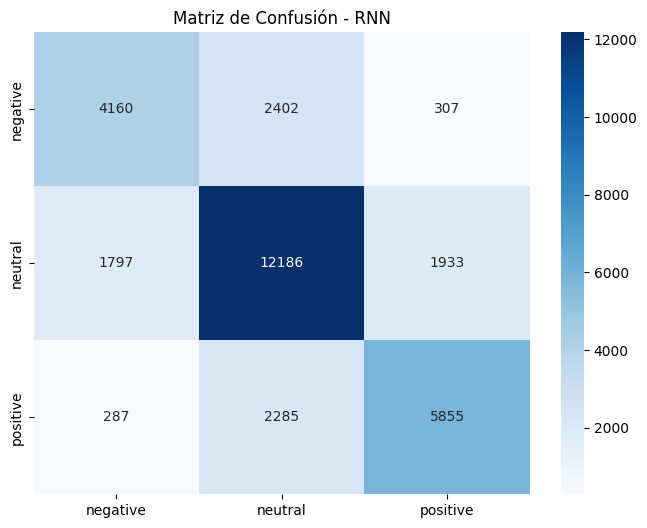


Entrenando el modelo LSTM...
Epoch 1/35


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1756/1756 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.6332 - loss: 0.8296 - val_accuracy: 0.7177 - val_loss: 0.6845
Epoch 2/35
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7387 - loss: 0.6420 - val_accuracy: 0.7340 - val_loss: 0.6560
Epoch 3/35
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7592 - loss: 0.5879 - val_accuracy: 0.7394 - val_loss: 0.6439
Epoch 4/35
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7773 - loss: 0.5480 - val_accuracy: 0.7414 - val_loss: 0.6455
Epoch 5/35
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7904 - loss: 0.5205 - val_accuracy: 0.7413 - val_loss: 0.6501
Epoch 6/35
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7958 - loss: 0.4980 - val_accuracy: 0.7432 - val_loss: 0.6692
Epoch 7/35
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8068 - loss: 0.4754 - val_accuracy: 0.7383 - val_loss: 0.6829
Epoch 8/35
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8149 - loss: 0.4530 - val

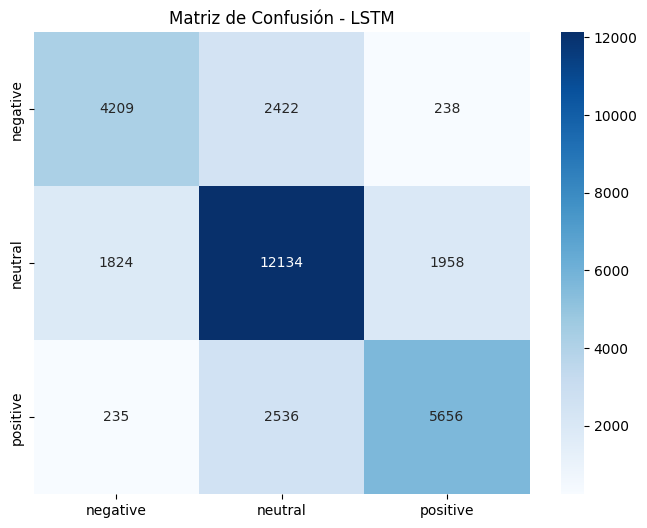


Entrenando el modelo GRU...
Epoch 1/35


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1756/1756 ━━━━━━━━━━━━━━━━━━━━ 73s 8ms/step - accuracy: 0.6327 - loss: 0.8279 - val_accuracy: 0.7230 - val_loss: 0.6777
Epoch 2/35
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7403 - loss: 0.6354 - val_accuracy: 0.7341 - val_loss: 0.6553
Epoch 3/35
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7614 - loss: 0.5891 - val_accuracy: 0.7431 - val_loss: 0.6435
Epoch 4/35
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7773 - loss: 0.5496 - val_accuracy: 0.7391 - val_loss: 0.6456
Epoch 5/35
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7889 - loss: 0.5200 - val_accuracy: 0.7391 - val_loss: 0.6505
Epoch 6/35
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7978 - loss: 0.4966 - val_accuracy: 0.7412 - val_loss: 0.6651
Epoch 7/35
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8078 - loss: 0.4720 - val_accuracy: 0.7380 - val_loss: 0.6818
Epoch 8/35
1756/1756 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8151 - loss: 0.4506 - val

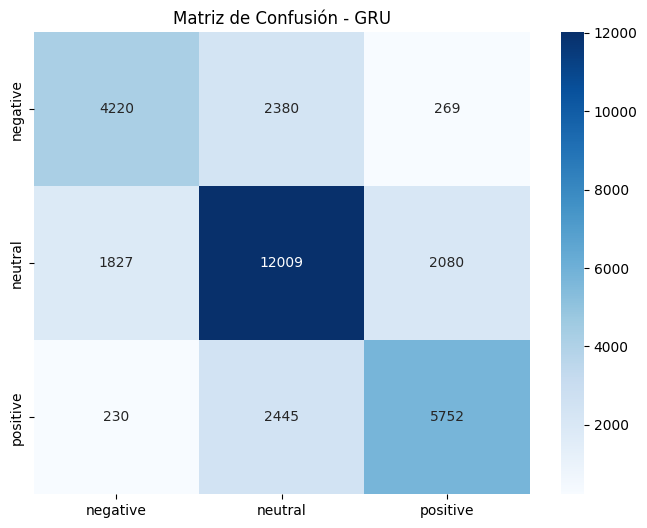

In [28]:
# Entrenar y evaluar los modelos de RNN, LSTM y GRU
rnn_model = modelo_rnn()
entrenar_y_evaluar(rnn_model, X_train, y_train, X_test, y_test, "RNN")

lstm_model = modelo_lstm()
entrenar_y_evaluar(lstm_model, X_train, y_train, X_test, y_test, "LSTM")

gru_model = modelo_gru()
entrenar_y_evaluar(gru_model, X_train, y_train, X_test, y_test, "GRU")

In [23]:
# Modelo Naive Bayes
vectorizer = CountVectorizer()
X_nb = vectorizer.fit_transform(train_data['Phrase'])
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, train_data['Simplified_Sentiment'], test_size=0.2, random_state=13, stratify=train_data['Simplified_Sentiment'])
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_nb, y_train_nb)

MultinomialNB()

In [25]:
# Predicciones con Naive Bayes
y_pred_nb = naive_bayes.predict(X_test_nb)
accuracy_nb = accuracy_score(y_test_nb, y_pred_nb)
print(f"\nAccuracy del modelo Naive Bayes: {accuracy_nb:.4f}")
report_nb = classification_report(y_test_nb, y_pred_nb, target_names=['negative', 'neutral', 'positive'])
print(f"\nReporte de clasificación para Naive Bayes:\n{report_nb}")


Accuracy del modelo Naive Bayes: 0.6854

Reporte de clasificación para Naive Bayes:
              precision    recall  f1-score   support

    negative       0.65      0.62      0.63      6869
     neutral       0.71      0.72      0.72     15916
    positive       0.67      0.67      0.67      8427

    accuracy                           0.69     31212
   macro avg       0.67      0.67      0.67     31212
weighted avg       0.68      0.69      0.69     31212



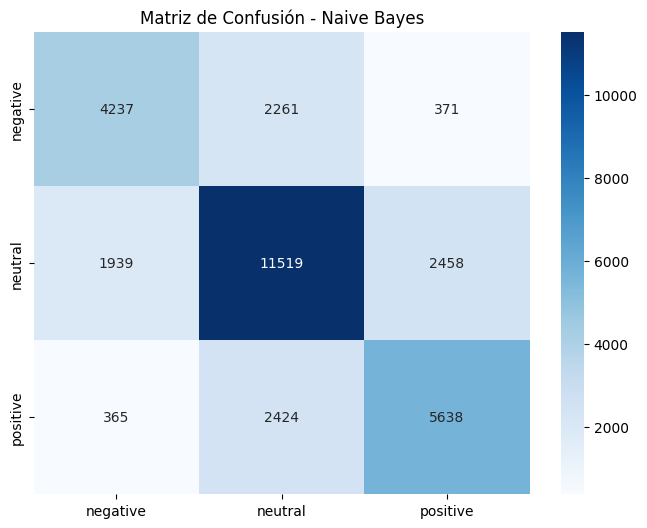

In [26]:
# Matriz de confusión Naive Bayes
conf_matrix_nb = confusion_matrix(y_test_nb, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.title('Matriz de Confusión - Naive Bayes')
plt.show()